In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import os
import numpy as np

# 数据集下载

In [2]:
mnist_dowmload =False

if not os.path.exists('./mnist/'):
    mnist_dowmload = True
train_data = torchvision.datasets.MNIST(
                                root= './mnist/',
                                train= True,
                                transform=torchvision.transforms.ToTensor(),
                                download=mnist_dowmload)

# 数据加载

In [3]:
train_loader =Data.DataLoader(dataset= train_data, batch_size=32, shuffle=True ) #训练集加载
test_data = torchvision.datasets.MNIST(root= './mnist/',train=False, transform=torchvision.transforms.ToTensor())#测试集
test_x = test_data.data.type(torch.FloatTensor)[:]/255
test_y = test_data.targets.numpy()[:]

# RNN网络

In [4]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         
            input_size=28,
            hidden_size=64,         
            num_layers=1,           
            batch_first=True,       
        )

        self.out = nn.Linear(64, 10)

    def forward(self, x):
  
        r_out, (h_n, h_c) = self.rnn(x, None)  

        
        out = self.out(r_out[:, -1, :])
        return out


rnn = RNN()
rnn

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

# 优化器及损失函数

In [5]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)   
loss_func = nn.CrossEntropyLoss() 

# 训练

In [6]:
ac=[]
ls=[]
for epoch in range(1):
    for step, (b_x, b_y) in enumerate(train_loader):        
        b_x = b_x.view(-1, 28, 28)              
        output = rnn(b_x)                        
        loss = loss_func(output, b_y)                   
        optimizer.zero_grad()                           
        loss.backward()                                 
        optimizer.step()                                
        if step % 50 == 0:
            test_output = rnn(test_x)                   
            pred_y = torch.max(test_output, 1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum())/ float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)
            ac.append(accuracy)
            ls.append(loss.data.numpy())

Epoch:  0 | train loss: 2.3044 | test accuracy: 0.10
Epoch:  0 | train loss: 1.4873 | test accuracy: 0.57
Epoch:  0 | train loss: 0.5221 | test accuracy: 0.70
Epoch:  0 | train loss: 0.6239 | test accuracy: 0.79
Epoch:  0 | train loss: 0.4893 | test accuracy: 0.83
Epoch:  0 | train loss: 0.5584 | test accuracy: 0.88
Epoch:  0 | train loss: 0.3608 | test accuracy: 0.88
Epoch:  0 | train loss: 0.1379 | test accuracy: 0.91
Epoch:  0 | train loss: 0.4124 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2266 | test accuracy: 0.91
Epoch:  0 | train loss: 0.1899 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2153 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2268 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3548 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1915 | test accuracy: 0.94
Epoch:  0 | train loss: 0.5789 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2816 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0792 | test accuracy: 0.94
Epoch:  0 | train loss: 0.4215 | test accuracy

# 测试

In [7]:
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 6 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number


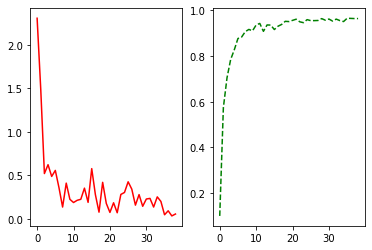

In [8]:
ac.append(accuracy)
ls.append(loss.data.numpy())
plt.subplot(121)#把图像分为1行2列，121代表1行2列中的第一个
plt.plot(ls, 'r-',label='loss' )

plt.subplot(122)#把图像分为1行2列，121代表1行2列中的第二个


plt.plot(ac, 'g--',label='ac' )


plt.show()